In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# 1️⃣ Load dataset (CIFAR-10 has 10 classes & 60,000 images)
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 176s 1us/step


In [3]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

In [6]:
# 4️⃣ Build improved CNN
model = models.Sequential()

# Conv Block 1
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Conv Block 2
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Conv Block 3
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Fully connected
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))


In [8]:
# 5️⃣ Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 6️⃣ Train (fewer epochs, but higher accuracy due to augmentation)
model.fit(datagen.flow(x_train, y_train, batch_size=64),
          epochs=10,
          validation_data=(x_test, y_test),
          verbose=1)

# 7️⃣ Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 48s 48ms/step - accuracy: 0.4810 - loss: 1.4332 - val_accuracy: 0.4920 - val_loss: 1.5350
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.6065 - loss: 1.1080 - val_accuracy: 0.6763 - val_loss: 0.9355
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 39ms/step - accuracy: 0.6585 - loss: 0.9740 - val_accuracy: 0.6769 - val_loss: 0.9486
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.6802 - loss: 0.9080 - val_accuracy: 0.7192 - val_loss: 0.8006
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 40ms/step - accuracy: 0.7109 - loss: 0.8453 - val_accuracy: 0.7068 - val_loss: 0.8359
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.7170 - loss: 0.8096 - val_accuracy: 0.7503 - val_loss: 0.7286
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.7330 - loss: 0.7732 - val_accuracy: 0.7475 - val_loss: 0.7270
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.7358 - loss: 0.7560 - 

In [9]:
# 8️⃣ Calculate Precision and Recall
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

precision = precision_score(y_true_classes, y_pred_classes, average='macro')
recall = recall_score(y_true_classes, y_pred_classes, average='macro')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Precision: 0.79
Recall: 0.76


Saving 0023.png to 0023 (2).png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


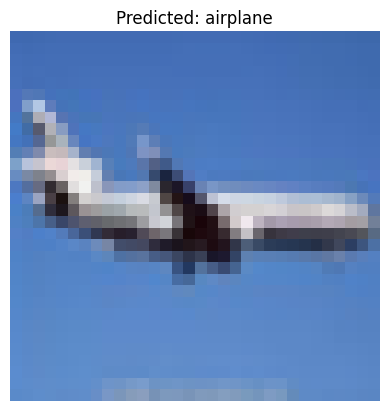

In [14]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np

uploaded = files.upload()

for fn in uploaded.keys():
  # Load the image
  path = fn
  img = image.load_img(path, target_size=(32, 32))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0) # Create a batch
  img_array /= 255.0 # Normalize the image

  # Make a prediction
  predictions = model.predict(img_array)
  predicted_class_index = np.argmax(predictions, axis=1)[0]
  predicted_class_name = class_names[predicted_class_index]

  # Display the image and prediction
  plt.imshow(img)
  plt.title(f"Predicted: {predicted_class_name}")
  plt.axis('off')
  plt.show()